In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
df.shape

(6435, 8)

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


### Which store has maximum sales

In [4]:
max_value = df.groupby('Store')['Weekly_Sales'].sum()
print("Store {} has maximum sales. Maximum sales is {}".format(max_value.idxmax(),max_value.max()))

Store 20 has maximum sales. Maximum sales is 301397792.46000004


### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [5]:
std_value = df.groupby('Store')['Weekly_Sales'].std()
print("Store {} has maximum standard deviation. Maximum standard deviation is {}".format(std_value.idxmax(),std_value.max()))

Store 14 has maximum standard deviation. Maximum standard deviation is 317569.9494755081


#### coefficient of mean to standard deviation

In [6]:
mean_data = df['Weekly_Sales'].mean()
std_data = df['Weekly_Sales'].std()
coefficient = std_data/mean_data
print("Coefficient of mean to standard deviation is {}".format(coefficient))

Coefficient of mean to standard deviation is 0.5390501956168998


#### coefficient of mean to standard deviation in store wise

In [7]:
df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean()

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

### Which store/s has good quarterly growth rate in Q3’2012

In [8]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [9]:
def quarterData(month):
    if month <= 3:
        return 'Q1'
    elif month > 3 and month <= 6:
        return 'Q2'
    elif month > 6 and month <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df['Quarter'] = df['Date'].dt.month.apply(quarterData)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1


In [10]:
quarter_value = df[(df['Quarter'] == 'Q3') & (df['Year'] == 2012)].groupby('Store')['Weekly_Sales'].sum()

In [11]:
print("Store {} has good quarterly growth rate in Q3-2012 {}".format(quarter_value.idxmax(),quarter_value.max()))

Store 4 has good quarterly growth rate in Q3-2012 27796792.46


### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [12]:
total = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
print('Total Value is ' + str(total))

mean_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
print('Mean Value for non holiday ' + str(mean_non_holiday))

Total Value is 505299551.56
Mean Value for non holiday 1041256.3802088564


In [13]:
non_holiday_data = df[(df['Holiday_Flag'] == 1) & (df['Weekly_Sales'] > mean_non_holiday)]
non_holiday_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9,Q3
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,Q4
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,Q4
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,Q1
...,...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011,12,Q4
5825,41,2012-02-10,1238844.56,1,22.00,3.103,196.919506,6.589,2012,2,Q1
5855,41,2012-09-07,1392143.82,1,67.41,3.596,198.095048,6.432,2012,9,Q3
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,11,Q4


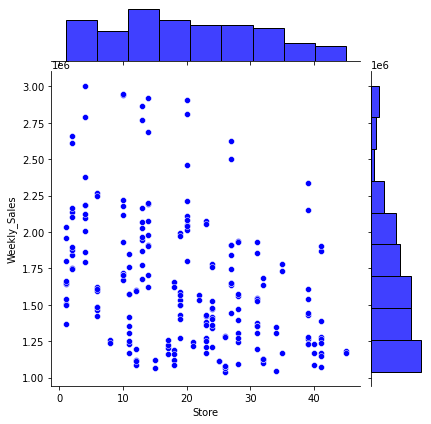

In [14]:
sns.jointplot(x='Store', y='Weekly_Sales', data=non_holiday_data, color='blue')

### Provide a monthly and semester view of sales in units and give insights

#### Monthly View

In [15]:
monthly_view_data = df[['Month', 'Weekly_Sales']].groupby(['Month']).sum()
monthly_view_data

,Weekly_Sales
Month,
1,3.325984e+08
2,5.687279e+08
3,5.927859e+08
4,6.468598e+08
5,5.571256e+08
6,6.226299e+08
7,6.500010e+08
8,6.130902e+08
9,5.787612e+08


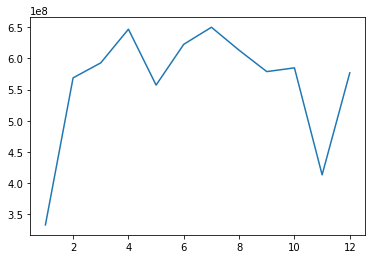

In [16]:
plt.plot(monthly_view_data)
plt.show()

<BarContainer object of 12 artists>

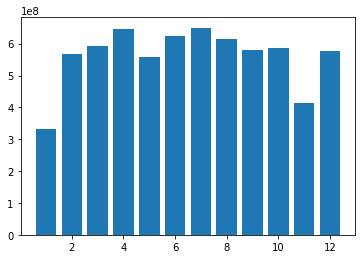

In [17]:
index_data = monthly_view_data.reset_index()
plt.bar(index_data['Month'], index_data['Weekly_Sales'])

#### Semester View

In [18]:
def semisterData(month):
    if month <= 6:
        return '1'
    else:
        return '2'

df['Semester'] = df['Date'].dt.month.apply(semisterData)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1,1


<BarContainer object of 2 artists>

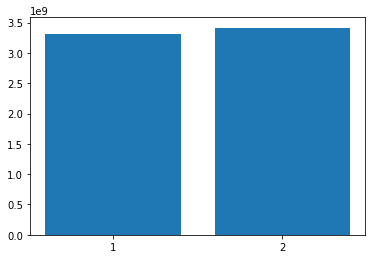

In [19]:
semester_view_data = df[['Semester', 'Weekly_Sales']].groupby(['Semester']).sum().reset_index()
plt.bar(semester_view_data['Semester'], semester_view_data['Weekly_Sales'])

## For Store 1 – Build  prediction models to forecast demand

#### 1. Linear Regression :– Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. <br> 2. Change dates into days by creating new variable.

#### Change dates into days by creating new variable.

In [20]:
df['Days'] = df['Date'].dt.day
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter,Semester,Days
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1,1,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1,1,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1,1,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1,1,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1,1,5


### Select the model which gives best accuracy.

In [21]:
store1 = df[df['Store'] == 1]
store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter,Semester,Days
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1,1,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1,1,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1,1,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1,1,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1,1,5


In [22]:
store1 = store1.drop(['Store', 'Date', 'Quarter', 'Semester'], axis=1)
store1.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Days
0,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [23]:
x_data = store1.drop(['Weekly_Sales'], axis=1)
x_data.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Days
0,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,38.51,2.548,211.242170,8.106,2010,2,12
2,0,39.93,2.514,211.289143,8.106,2010,2,19
3,0,46.63,2.561,211.319643,8.106,2010,2,26
4,0,46.50,2.625,211.350143,8.106,2010,3,5


##### Train Model

In [24]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [25]:
train_X, test_X, train_y, test_y = train_test_split(x_data, store1['Weekly_Sales'])

In [26]:
train_X.shape, test_X.shape

((107, 8), (36, 8))

##### Build the model on training data

In [27]:
store1_data = sm.OLS(train_y,train_X.astype(float)).fit()
store1_data.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.990     
Dependent Variable:     Weekly_Sales     AIC:                         2866.9928 
Date:                   2021-02-27 03:27 BIC:                         2888.3755 
No. Observations:       107              Log-Likelihood:              -1425.5   
Df Model:               8                F-statistic:                 1386.     
Df Residuals:           99               Prob (F-statistic):          5.29e-98  
R-squared (uncentered): 0.991            Scale:                       2.3603e+10
---------------------------------------------------------------------------------
                  Coef.      Std.Err.      t     P>|t|      [0.025       0.975]  
---------------------------------------------------------------------------------
Holiday_Flag    76249.1580  56513.9916   1.3492  0.1803  -35886.8622  188385.1782
Temperature     -3440.1587   1213.5146  -2.8349  0.0056   -5848.0349   -1032.2825
Fuel_Price      30017.5786  60469.7447   0.4964  0.6207  -89967.5139  150002.6711
CPI             10508.1030   8391.3405   1.2523  0.2134   -6142.1371   27158.3430
Unemployment    38618.3055  68753.7145   0.5617  0.5756  -97803.9803  175040.5913
Year             -442.5843   1061.8490  -0.4168  0.6777   -2549.5230    1664.3545
Month           13250.1554   4830.8244   2.7428  0.0072    3664.7518   22835.5591
Days            -4563.3849   1746.3249  -2.6131  0.0104   -8028.4723   -1098.2975
--------------------------------------------------------------------------------
Omnibus:                  69.433            Durbin-Watson:               2.072  
Prob(Omnibus):            0.000             Jarque-Bera (JB):            387.156
Skew:                     2.135             Prob(JB):                    0.000  
Kurtosis:                 11.283            Condition No.:               10408  
================================================================================
* The condition number is large (1e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [28]:
pred_y = store1_data.predict(test_X)

In [29]:
np.sqrt(metrics.mean_squared_error(pred_y,test_y))

70129.7065354038

In [30]:
test_X.iloc[:1,:].to_csv("New_data_for_Walmart.csv", index = False)

In [31]:
new_data = pd.read_csv("New_data_for_Walmart.csv")
new_data

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Days
0,0,75.55,3.749,221.6718,7.143,2012,5,4


In [32]:
pred_y_new = store1_data.predict(new_data)

In [33]:
pred_y_new

0    1.615350e+06
dtype: float64

In [34]:
new_data["Predicted_WeeklySales"] = pred_y_new

In [35]:
pred_y_new.to_csv("Predicted Results of New Data.csv")

### 2nd Way

In [36]:
# x = store1.drop(['Store','Weekly_Sales'], axis=1)
# x.head()

In [37]:
# y = store1['Weekly_Sales']
# y.head()

In [38]:
## importing necessary models.
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
# lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
# lin_reg.fit(x,y)

In [39]:
# lin_reg.coef_

In [40]:
# lin_reg.intercept_

In [41]:
# train_data = lin_reg.predict(x)

In [42]:
# from sklearn.metrics import r2_score
# r2_score(y,train_data)